# Applying Logistic Regression and SVM
---

In this notebook, we will discuss the basics of applying the logistic regression and the SVM to classification problems using `sklearn`.

**NOTE:** the course/notebooks assume the knowledge of the following:
* Machine Learning knowledge in general in terms of training, cost function, some algorithms, etc.
* How the Logisitic regression and SVM work generally.
* `sklearn` classes and their methods.


## Data

For the data, we will use the digits dataset from `sklearn.datasets`.

In [1]:
from sklearn.datasets import load_digits

digits = load_digits()
X, y = digits.data, digits.target

In [2]:
X.shape, y.shape

((1797, 64), (1797,))

We can split the data to train set and test set.

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y)

## Logistic Regression

First, we import the `LogisticRegression` class from the `linear_model` module in the `sklearn` package.

In [4]:
from sklearn.linear_model import LogisticRegression

We create an instance from the `LogisticRegression` class and fit our training data `X_train, y_train` to it using the `fit` method.

In [5]:
lr = LogisticRegression()

lr.fit(X_train, y_train)

c:\users\u\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

We can get the accuracy of the training by passing our data to the `score` method of the model.

In [6]:
lr.score(X_train, y_train)

1.0

We can get the test accuracy by passing the test set to the `score` method.

In [7]:
lr.score(X_test, y_test)

0.9533333333333334

The target has 3 classes.Let's predict the target of the first row. We do this using the `predict` method and pass the features of the example we want to predict its target.

In [8]:
lr.predict(X[0:1, :])

array([0])

We can get the probability of each class for that example using `predict_proba`.

In [9]:
lr.predict_proba(X[0:1, :])

array([[9.99999968e-01, 6.66444945e-18, 5.22875214e-12, 1.86657778e-12,
        3.65203186e-10, 7.76878027e-09, 1.07657957e-09, 6.96269190e-09,
        1.56724525e-08, 2.89119115e-10]])

We can see that the model predicts by 99% that the target for that example is the first class (0).

## SVM

To use the basic type of SVM, the linear SVM, we import `LinearSVC` from `sklearn.svm`. It has the same functionalities as the logisitc regression class.

In [10]:
from sklearn.svm import LinearSVC

In [11]:
svm = LinearSVC(max_iter = 2000)

In [12]:
svm.fit(X_train, y_train)

c:\users\u\appdata\local\programs\python\python39\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


LinearSVC(max_iter=2000)

In [13]:
svm.score(X_train, y_train)

0.9948032665181886

In [14]:
svm.score(X_test, y_test)

0.9533333333333334

> Note that the `LogisticRegression` and `LinearSVC` handle the multi-class target internally.

We can also use the non-linear SVM using the `SVC` class from `sklearn.svm`.

In [15]:
from sklearn.svm import SVC

In [16]:
svm_non_linear = SVC()

In [17]:
svm_non_linear.fit(X_train, y_train)

SVC()

In [18]:
svm_non_linear.score(X_train, y_train)

0.9962880475129918

In [19]:
svm_non_linear.score(X_test, y_test)

0.9822222222222222

## Linear Decision Boundaries

A decision boundary is called to be **linear** if it looks like a line "hyperplane" cutting the features space into 2 halves. Other than that, the decision boundary is considered to be **non-linear** which sometimes leading to non-contiguous regions of class separation.

![](assets/images/linear-non-db)


The logistic regression and linear SVM, using the normal feature space, are called **linear classifiers** because they learn linear decision boundaries. While the non-linear version of SVM can learn non-linear decision boundaries.

We call the data linear separable if it can be perfectly explained by a linear classifier.

![](assets/images/data-linear-sep)

We can visualize the decision boundaries of different classifiers. First we make a function that creates a meshgrid of the all possible X, y combinations. The following is valid for data of 2 features.

In [20]:
import numpy as np

def make_meshgrid(X, y, step = 0.02):
    x_min, x_max = X.min() - 1, X.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, step), np.arange(y_min, y_max, step))
    return xx, yy

Then we create a function that draws contours based on the class prediction from the model.

In [32]:
def plot_contours(ax, classifier, xx, yy, **params_kwargs):
    z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])
    z = z.reshape(xx.shape)
    out = ax.contourf(xx, yy, z, **params_kwargs)
    return out

In [33]:
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data[:, :2]
y = iris.target
X.shape, y.shape

((150, 2), (150,))

In [34]:
model = LinearSVC()
model.fit(X, y)

c:\users\u\appdata\local\programs\python\python39\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


LinearSVC()

In [35]:
import matplotlib.pyplot as plt
%matplotlib inline

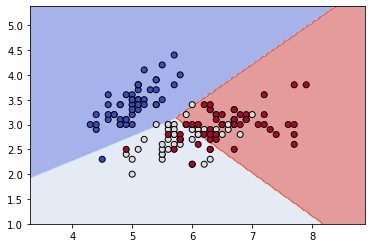

In [39]:
fig, ax = plt.subplots()

x0, x1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(x0, x1)
plot_contours(ax, model, xx, yy, cmap=plt.cm.coolwarm, alpha=0.5)
ax.scatter(x0, x1, c=y, cmap=plt.cm.coolwarm, edgecolors="black")

In [42]:
model = SVC()
model.fit(X, y)

SVC()

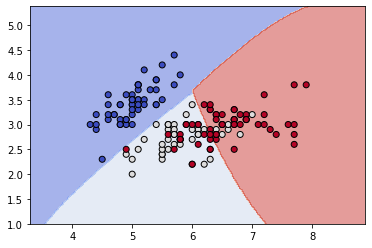

In [43]:
fig, ax = plt.subplots()

x0, x1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(x0, x1)
plot_contours(ax, model, xx, yy, cmap=plt.cm.coolwarm, alpha=0.5)
ax.scatter(x0, x1, c=y, cmap=plt.cm.coolwarm, edgecolors="black")